<a href="https://colab.research.google.com/github/rugellioliveira/Desafio-Analise-de-Dados-para-SEO/blob/main/DesafioAnaliseDadosSEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color= yellow> **Preparação do ambiente para a conexão com a base de dados:**

In [ ]:
# instala gspread, que é a biblioteca necessária para interagir uma planilha do Google Sheets
!pip install --upgrade gspread

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.5 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2


In [ ]:
# Configuração da autenticação OAuth2, com as credenciais de serviço do Google Cloud Platform para acessar a planilha do Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
# Abre a planilha
planilha = gc.open('Cópia de Desafio Análise de Dados e SEO Melhor Plano')
aba_urls = planilha.worksheet('urls')
aba_funil = planilha.worksheet('funil')

In [ ]:
# Lê cabeçalho da aba "urls"
aba_urls.row_values(1)

['url',
 'clicks',
 'impressions',
 'ctr',
 'position',
 'clicks_previous',
 'impressions_previous',
 'ctr_previous',
 'position_previous',
 'clickoffs_previous',
 'clickoffs',
 'silo']

In [ ]:
# Lê cabeçalho da aba "funil"
aba_funil.row_values(1)

['url', 'funil']

In [ ]:
# Importação da biblioteca pandas
import pandas as pd

#<font color= yellow> **Verificação dos dados da aba "funil":**

In [ ]:
# Criação do DataFrame a partir dos dados da aba funil
funil = pd.DataFrame(aba_funil.get_all_records())

# Substituir valores vazios por NaN
funil.replace(['', 'NA', 'N/A'], pd.NA, inplace=True)

# Exibir DataFrame
display(funil)

,url,funil
0,/agtnet,fundo
1,/algar-telecom,meio
2,/algar-telecom/algar-telecom-2-via,topo
3,/algar-telecom/algar-telecom-celular,fundo
4,/algar-telecom/algar-telecom-internet,fundo
...,...,...
924,/vivo/vivo-play,topo
925,/vivo/vivo-regulariza,topo
926,/vivo/vivo-sac,topo
927,/vivo/vivo-tv,fundo


#<font color= yellow> **Verificação dos dados da aba "urls":**

In [ ]:
# Criação do DataFrame a partir dos dados da aba urls
urls = pd.DataFrame(aba_urls.get_all_records())

# Substituir valores vazios por NaN
urls.replace(['', 'NA', 'N/A'], pd.NA, inplace=True)

# Exibir DataFrame
display(urls)

,url,clicks,impressions,ctr,position,clicks_previous,impressions_previous,ctr_previous,position_previous,clickoffs_previous,clickoffs,silo
0,/agtnet,256,840,0.035881,6.534267,242,33217,0.044211,22.166461,30,204,regionais
1,/algar-telecom,1,3215,0.00719,54.522420,13,7416,0.000226,9.394839,<NA>,<NA>,regionais
2,/algar-telecom/algar-telecom-2-via,850,16462,0.161332,2.364724,4523,146249,0.101568,13.351718,0,11,regionais
3,/algar-telecom/algar-telecom-celular,1518,40557,0.13191,15.914198,2468,13159,0.023319,21.08336,28,11,regionais
4,/algar-telecom/algar-telecom-internet,884,60153,0.011151,12.242470,85,19531,0.050535,21.614295,91,65,regionais
...,...,...,...,...,...,...,...,...,...,...,...,...
924,/vivo/vivo-play,96,75251,0.000912,3.830045,257,47270,0.00028,3.454239,11,20,vivo
925,/vivo/vivo-regulariza,632,217276,0.00336,23.539364,2612,1155041,0.014672,30.243668,153,72,vivo
926,/vivo/vivo-sac,2828,833525,0.006707,0.792724,5849,703865,0.021006,13.094713,80,29,vivo
927,/vivo/vivo-tv,228,28749,0.004802,19.790026,65,96910,0.006878,39.781625,74,151,vivo


#<font color= yellow> **Relacionando as duas bases de dados:**

In [ ]:
# Instala a biblioteca que permite executar operações SQL diretamente em DataFrames do Pandas, facilitando a manipulação e a junção de dados usando a sintaxe SQL padrão
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=8425f530a74327863f6f54bbdcfe113891e8e2584a7e6ccc6fa9e2424829b951
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
# Verifica se todas as linhas da coluna "url" de ambas as bases de dados são iguais (para favorecer a escolha do tipo de "join")
display((urls['url'] == funil['url']).all())

True

In [ ]:
# Verifica se a coluna url tem valores duplicados (quantidade de duplicatas)
urls['url'].duplicated().sum()

0

In [ ]:
# Importa a biblioteca necessária para uso de sintaxe SQL
from pandasql import sqldf

# Define a consulta SQL
query = """
SELECT u.url, u.clicks, u.impressions, u.ctr, u.position, u.clicks_previous, u.impressions_previous, u.ctr_previous, u.position_previous, u.clickoffs_previous, u.clickoffs, u.silo,
       f.funil
FROM urls u
INNER JOIN funil f ON u.url = f.url
ORDER BY 1
"""
# DataFrame resultante
dados_SEO = sqldf(query, globals())

# Exibir DataFrame
display(dados_SEO)


,url,clicks,impressions,ctr,position,clicks_previous,impressions_previous,ctr_previous,position_previous,clickoffs_previous,clickoffs,silo,funil
0,/agtnet,256.0,840,0.03588096499,6.534267,242.0,33217.0,0.04421097299,22.16646085,30.0,204.0,regionais,fundo
1,/algar-telecom,1.0,3215,0.007190166456,54.522420,13.0,7416.0,0.0002256583796,9.394838507,NaN,NaN,regionais,meio
2,/algar-telecom/algar-telecom-2-via,850.0,16462,0.1613316706,2.364724,4523.0,146249.0,0.1015676088,13.35171823,0.0,11.0,regionais,topo
3,/algar-telecom/algar-telecom-celular,1518.0,40557,0.1319104194,15.914198,2468.0,13159.0,0.0233194345,21.08335972,28.0,11.0,regionais,fundo
4,/algar-telecom/algar-telecom-internet,884.0,60153,0.01115074836,12.242470,85.0,19531.0,0.05053533457,21.61429504,91.0,65.0,regionais,fundo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,/vivo/vivo-play,96.0,75251,0.0009115641666,3.830045,257.0,47270.0,0.0002796346537,3.454239422,11.0,20.0,vivo,topo
925,/vivo/vivo-regulariza,632.0,217276,0.00335970678,23.539364,2612.0,1155041.0,0.01467191311,30.24366795,153.0,72.0,vivo,topo
926,/vivo/vivo-sac,2828.0,833525,0.006706693121,0.792724,5849.0,703865.0,0.02100625756,13.09471266,80.0,29.0,vivo,topo
927,/vivo/vivo-tv,228.0,28749,0.004802412775,19.790026,65.0,96910.0,0.006878465233,39.7816251,74.0,151.0,vivo,fundo


#<font color= yellow> **Análise da nova base de dados:**

In [ ]:
# Dimensão do Dataframe
dados_SEO.shape

(929, 13)

In [ ]:
# Exibe informações gerais da tabela (índice, quantidade de informações não nulas, tipo de dados, etc...)
dados_SEO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   929 non-null    object 
 1   clicks                901 non-null    float64
 2   impressions           929 non-null    int64  
 3   ctr                   901 non-null    object 
 4   position              929 non-null    float64
 5   clicks_previous       893 non-null    float64
 6   impressions_previous  921 non-null    float64
 7   ctr_previous          893 non-null    object 
 8   position_previous     921 non-null    object 
 9   clickoffs_previous    638 non-null    float64
 10  clickoffs             649 non-null    float64
 11  silo                  926 non-null    object 
 12  funil                 924 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 94.5+ KB


In [ ]:
# Convertendo tipo de dados de algumas colunas
dados_SEO['ctr'] = dados_SEO['ctr'].astype(float)
dados_SEO['ctr_previous'] = dados_SEO['ctr_previous'].astype(float)
dados_SEO['position_previous'] = dados_SEO['position_previous'].astype(float)

# Verificando
dados_SEO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   929 non-null    object 
 1   clicks                901 non-null    float64
 2   impressions           929 non-null    int64  
 3   ctr                   901 non-null    float64
 4   position              929 non-null    float64
 5   clicks_previous       893 non-null    float64
 6   impressions_previous  921 non-null    float64
 7   ctr_previous          893 non-null    float64
 8   position_previous     921 non-null    float64
 9   clickoffs_previous    638 non-null    float64
 10  clickoffs             649 non-null    float64
 11  silo                  926 non-null    object 
 12  funil                 924 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 94.5+ KB


In [ ]:
# Quantidade de campos nulos por coluna
dados_SEO.isnull().sum()

url                       0
clicks                   28
impressions               0
ctr                      28
position                  0
clicks_previous          36
impressions_previous      8
ctr_previous             36
position_previous         8
clickoffs_previous      291
clickoffs               280
silo                      3
funil                     5
dtype: int64

In [ ]:
# Verifica a quantidade de registros(linhas) duplicados no DataFrame
dados_SEO.duplicated().sum()

0

In [ ]:
# Quantidade de valores distintos por coluna
dados_SEO.nunique()

url                     929
clicks                  571
impressions             893
ctr                     901
position                929
clicks_previous         626
impressions_previous    910
ctr_previous            893
position_previous       921
clickoffs_previous      205
clickoffs               230
silo                     11
funil                     3
dtype: int64

In [ ]:
# Estatística descritiva das colunas numéricas do DataFrame
dados_SEO.describe()

,clicks,impressions,ctr,position,clicks_previous,impressions_previous,ctr_previous,position_previous,clickoffs_previous,clickoffs
count,901.000000,9.290000e+02,901.000000,929.000000,893.000000,9.210000e+02,893.000000,921.000000,638.000000,649.000000
mean,1199.205327,7.213852e+04,0.054980,18.356795,1941.602464,1.091687e+05,0.080158,29.894715,186.329154,206.497689
std,3441.477101,2.340357e+05,0.161702,23.155325,5413.733299,3.414765e+05,0.186108,32.848587,883.887189,911.157596
min,0.000000,0.000000e+00,0.000029,0.037089,0.000000,0.000000e+00,0.000023,0.059077,0.000000,0.000000
25%,35.000000,2.374000e+03,0.007141,6.542029,64.000000,3.984000e+03,0.011563,10.554587,5.000000,6.000000
50%,219.000000,1.181200e+04,0.021188,12.584636,344.000000,2.116300e+04,0.028037,21.801201,20.000000,23.000000
75%,945.000000,5.274400e+04,0.051378,21.446175,1657.000000,7.704800e+04,0.082875,35.778214,92.000000,102.000000
max,66220.000000,3.053848e+06,2.613768,239.408096,90162.000000,5.476761e+06,3.129555,262.279968,15760.000000,17396.000000


#<font color= yellow> **Tratamento de valores ausentes:**

É recomendado substituir valores nulos nas colunas da base de dados por valores apropriados. Isso é importante para garantir a integridade dos dados e evitar distorções nas análises que serão realizadas posteriormente.
Considerando o contexto abordado neste desafio, a imputação com estatísticas descritivas é geralmente preferível, pois permite preservar a integridade dos dados enquanto fornece insights valiosos para otimização de SEO e análises relacionadas.

**Verificar visualmente a distribuição dos dados nas colunas numéricas e a moda nas colunas categóricas do DataFrame:**

In [ ]:
# Bibliotecas para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-21-fe037f7a806f>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-21-fe037f7a806f>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot( Linhas, Colunas, 1)


<Axes: title={'left': 'funil'}, xlabel='funil', ylabel='count'>

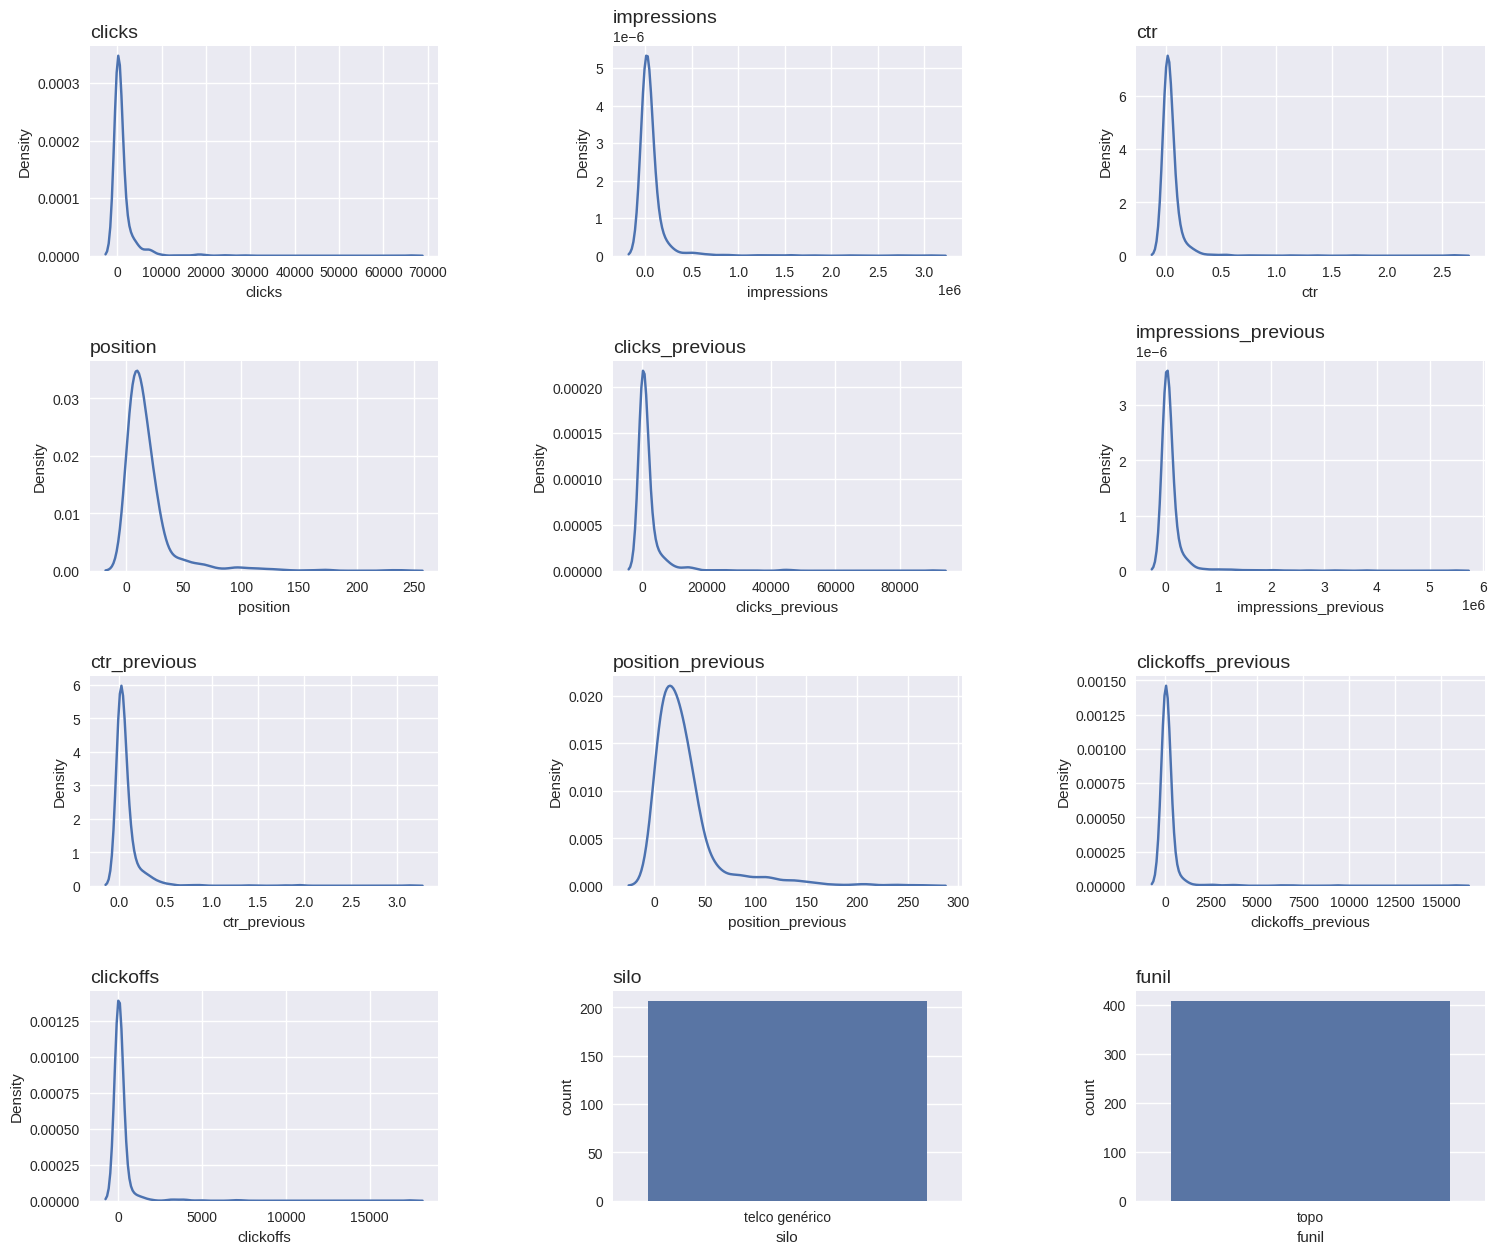

In [ ]:
# Tamanho da Imagem
fig, ax = plt.subplots( figsize=(18, 15) )

# Ajustando o espaçamento vertical entre os subplots
plt.subplots_adjust(hspace=0.5)

# Ajustando o espaçamento horizontal entre os subplots
plt.subplots_adjust(wspace=0.5)

# Estilo dos gráficos
plt.style.use('seaborn')

# Parametros para o grid
Linhas = 4
Colunas = 3

# Acessando gráfico 1
plt.subplot( Linhas, Colunas, 1)
# Titulo
plt.title('clicks', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['clicks'] )

# Acessando gráfico 2
plt.subplot( Linhas, Colunas, 2)
# Titulo
plt.title('impressions', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['impressions'] )

# Acessando gráfico 3
plt.subplot( Linhas, Colunas, 3)
# Titulo
plt.title('ctr', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['ctr'] )

# Acessando gráfico 4
plt.subplot( Linhas, Colunas, 4)
# Titulo
plt.title('position', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['position'] )

# Acessando gráfico 5
plt.subplot( Linhas, Colunas, 5)
# Titulo
plt.title('clicks_previous', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['clicks_previous'] )

# Acessando gráfico 6
plt.subplot( Linhas, Colunas, 6)
# Titulo
plt.title('impressions_previous', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['impressions_previous'] )

# Acessando gráfico 7
plt.subplot( Linhas, Colunas, 7)
# Titulo
plt.title('ctr_previous', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['ctr_previous'] )

# Acessando gráfico 8
plt.subplot( Linhas, Colunas, 8)
# Titulo
plt.title('position_previous', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['position_previous'] )

# Acessando gráfico 9
plt.subplot( Linhas, Colunas,9)
# Titulo
plt.title('clickoffs_previous', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['clickoffs_previous'] )

# Acessando gráfico 10
plt.subplot( Linhas, Colunas, 10)
# Titulo
plt.title('clickoffs', loc='left', fontsize=14 )
# Grafico
sns.kdeplot( dados_SEO['clickoffs'] )

# Acessando gráfico 11
plt.subplot( Linhas, Colunas, 11)
# Titulo
plt.title('silo', loc='left', fontsize=14 )
# Grafico
moda_silo = dados_SEO['silo'].mode()[0]
sns.countplot(data=dados_SEO[dados_SEO['silo'] == moda_silo], x='silo')

# Acessando gráfico 12
plt.subplot( Linhas, Colunas, 12)
# Titulo
plt.title('funil', loc='left', fontsize=14 )
# Grafico
moda_funil = dados_SEO['funil'].mode()[0]
sns.countplot(data=dados_SEO[dados_SEO['funil'] == moda_funil], x='funil')

Ao examinar as curvas de distribuição plotadas anteriomente, percebe-se que em todas a distribuição dos dados é assimétrica positiva.

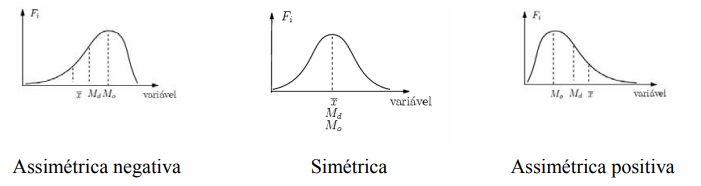


Sendo assim, substituir os valores nulos de cada coluna da base de dados pelos respectivos valores mais frequentes é uma boa abordagem. Uma vez que a moda representa o ponto central onde a maior quantidade de observações se concentra, o que é típico em distribuições com assimetria positiva. Também será realizado o mesmo processo nas colunas que contém dados categóricos.

In [ ]:
# Substituindo os valores ausentes da base de dados

dados_SEO['clicks'] = dados_SEO['clicks'].fillna(dados_SEO['clicks'].mode()[0])
dados_SEO['ctr'] = dados_SEO['ctr'].fillna(dados_SEO['ctr'].mode()[0])
dados_SEO['clicks_previous'] = dados_SEO['clicks_previous'].fillna(dados_SEO['clicks_previous'].mode()[0])
dados_SEO['impressions_previous'] = dados_SEO['impressions_previous'].fillna(dados_SEO['impressions_previous'].mode()[0])
dados_SEO['ctr_previous'] = dados_SEO['ctr_previous'].fillna(dados_SEO['ctr_previous'].mode()[0])
dados_SEO['position_previous'] = dados_SEO['position_previous'].fillna(dados_SEO['position_previous'].mode()[0])
dados_SEO['clickoffs_previous'] = dados_SEO['clickoffs_previous'].fillna(dados_SEO['clickoffs_previous'].mode()[0])
dados_SEO['clickoffs'] = dados_SEO['clickoffs'].fillna(dados_SEO['clickoffs'].mode()[0])
dados_SEO['silo'] = dados_SEO['silo'].fillna(moda_silo)
dados_SEO['funil'] = dados_SEO['funil'].fillna(moda_funil)

#Verificando resultado
dados_SEO.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   929 non-null    object 
 1   clicks                929 non-null    float64
 2   impressions           929 non-null    int64  
 3   ctr                   929 non-null    float64
 4   position              929 non-null    float64
 5   clicks_previous       929 non-null    float64
 6   impressions_previous  929 non-null    float64
 7   ctr_previous          929 non-null    float64
 8   position_previous     929 non-null    float64
 9   clickoffs_previous    929 non-null    float64
 10  clickoffs             929 non-null    float64
 11  silo                  929 non-null    object 
 12  funil                 929 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 94.5+ KB


In [ ]:
# DataFrame atualizado
dados_SEO

,url,clicks,impressions,ctr,position,clicks_previous,impressions_previous,ctr_previous,position_previous,clickoffs_previous,clickoffs,silo,funil
0,/agtnet,256.0,840,0.035881,6.534267,242.0,33217.0,0.044211,22.166461,30.0,204.0,regionais,fundo
1,/algar-telecom,1.0,3215,0.007190,54.522420,13.0,7416.0,0.000226,9.394839,2.0,1.0,regionais,meio
2,/algar-telecom/algar-telecom-2-via,850.0,16462,0.161332,2.364724,4523.0,146249.0,0.101568,13.351718,0.0,11.0,regionais,topo
3,/algar-telecom/algar-telecom-celular,1518.0,40557,0.131910,15.914198,2468.0,13159.0,0.023319,21.083360,28.0,11.0,regionais,fundo
4,/algar-telecom/algar-telecom-internet,884.0,60153,0.011151,12.242470,85.0,19531.0,0.050535,21.614295,91.0,65.0,regionais,fundo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,/vivo/vivo-play,96.0,75251,0.000912,3.830045,257.0,47270.0,0.000280,3.454239,11.0,20.0,vivo,topo
925,/vivo/vivo-regulariza,632.0,217276,0.003360,23.539364,2612.0,1155041.0,0.014672,30.243668,153.0,72.0,vivo,topo
926,/vivo/vivo-sac,2828.0,833525,0.006707,0.792724,5849.0,703865.0,0.021006,13.094713,80.0,29.0,vivo,topo
927,/vivo/vivo-tv,228.0,28749,0.004802,19.790026,65.0,96910.0,0.006878,39.781625,74.0,151.0,vivo,fundo


In [ ]:
# Estatística descritiva das colunas numéricas do DataFrame
dados_SEO.describe()

,clicks,impressions,ctr,position,clicks_previous,impressions_previous,ctr_previous,position_previous,clickoffs_previous,clickoffs
count,929.000000,9.290000e+02,929.000000,929.000000,929.000000,9.290000e+02,929.000000,929.000000,929.000000,929.000000
mean,1163.121636,7.213852e+04,0.053324,18.356795,1866.362756,1.082286e+05,0.077053,29.637788,128.589882,144.560818
std,3395.342747,2.340357e+05,0.159521,23.155325,5320.913094,3.401512e+05,0.183117,32.822788,737.284952,767.212885
min,0.000000,0.000000e+00,0.000029,0.037089,0.000000,0.000000e+00,0.000023,0.059077,0.000000,0.000000
25%,26.000000,2.374000e+03,0.006391,6.542029,49.000000,3.729000e+03,0.009979,10.295142,2.000000,1.000000
50%,194.000000,1.181200e+04,0.020094,12.584636,300.000000,2.095500e+04,0.025996,21.738858,6.000000,7.000000
75%,922.000000,5.274400e+04,0.049268,21.446175,1604.000000,7.622100e+04,0.078291,35.716343,41.000000,50.000000
max,66220.000000,3.053848e+06,2.613768,239.408096,90162.000000,5.476761e+06,3.129555,262.279968,15760.000000,17396.000000


#<font color= yellow> **Respondendo algumas perguntas do desafio:**

**1. Quantos silos existem na base de dados?**




In [ ]:
# Quantidade de silos existentes
num_silos = dados_SEO['silo'].nunique()

print(f'Existem {num_silos} silos na base de dados.')

Existem 11 silos na base de dados.


**2. Qual o silo com mais tráfego orgânico?**

In [ ]:
# Agrupando por silo e calculando o total de clicks
silo_trafego = dados_SEO.groupby('silo')['clicks'].sum().reset_index()

# Encontrando o silo com maior tráfego orgânico
silo_maior_trafego = silo_trafego.loc[silo_trafego['clicks'].idxmax()]

print(f'O silo com maior tráfego orgânico é "{silo_maior_trafego["silo"]}" com {silo_maior_trafego["clicks"]} cliques.')

O silo com maior tráfego orgânico é "vivo" com 195626.0 cliques.


**3. Qual silo teve o maior ganho de tráfego orgânico no período analisado?**

In [ ]:
# Calculando o ganho de tráfego orgânico para cada url (linha da base de dados)
dados_SEO['ganho_trafego'] = dados_SEO['clicks'] - dados_SEO['clicks_previous']
dados_SEO

,url,clicks,impressions,ctr,position,clicks_previous,impressions_previous,ctr_previous,position_previous,clickoffs_previous,clickoffs,silo,funil,ganho_trafego
0,/agtnet,256.0,840,0.035881,6.534267,242.0,33217.0,0.044211,22.166461,30.0,204.0,regionais,fundo,14.0
1,/algar-telecom,1.0,3215,0.007190,54.522420,13.0,7416.0,0.000226,9.394839,2.0,1.0,regionais,meio,-12.0
2,/algar-telecom/algar-telecom-2-via,850.0,16462,0.161332,2.364724,4523.0,146249.0,0.101568,13.351718,0.0,11.0,regionais,topo,-3673.0
3,/algar-telecom/algar-telecom-celular,1518.0,40557,0.131910,15.914198,2468.0,13159.0,0.023319,21.083360,28.0,11.0,regionais,fundo,-950.0
4,/algar-telecom/algar-telecom-internet,884.0,60153,0.011151,12.242470,85.0,19531.0,0.050535,21.614295,91.0,65.0,regionais,fundo,799.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,/vivo/vivo-play,96.0,75251,0.000912,3.830045,257.0,47270.0,0.000280,3.454239,11.0,20.0,vivo,topo,-161.0
925,/vivo/vivo-regulariza,632.0,217276,0.003360,23.539364,2612.0,1155041.0,0.014672,30.243668,153.0,72.0,vivo,topo,-1980.0
926,/vivo/vivo-sac,2828.0,833525,0.006707,0.792724,5849.0,703865.0,0.021006,13.094713,80.0,29.0,vivo,topo,-3021.0
927,/vivo/vivo-tv,228.0,28749,0.004802,19.790026,65.0,96910.0,0.006878,39.781625,74.0,151.0,vivo,fundo,163.0


In [ ]:
# Agrupando por silo e calculando o ganho de tráfego
silo_ganho_trafego = dados_SEO.groupby('silo')['ganho_trafego'].sum().reset_index()

# Ordenando em ordem decrescente
silo_ganho_trafego.sort_values(by='ganho_trafego', ascending=False)

,silo,ganho_trafego
1,genérico topo de funil,-1367.0
2,nextel,-9289.0
4,planos de celular,-21921.0
5,regionais,-23232.0
6,residencial,-31661.0
7,sky,-43727.0
9,tim,-59647.0
0,claro,-77824.0
3,oi,-96054.0
10,vivo,-104841.0


In [ ]:
# Encontrando o silo com maior tráfego orgânico
silo_maior_ganho_trafego = silo_ganho_trafego.loc[silo_ganho_trafego['ganho_trafego'].idxmax(), 'silo']

print(f'O silo com maior ganho de tráfego orgânico é "{silo_maior_ganho_trafego}".')

O silo com maior ganho de tráfego orgânico é "genérico topo de funil".


**4 . Ao ver um resultado de busca no Google, o usuário normalmente entra nas páginas que estão nas primeiras posições. Por esta razão, normalmente os primeiros resultados têm um CTR mais alto. Outros aspectos podem influenciar o CTR: mesmo uma página bem posicionada pode ter um CTR ruim por algum problema como: título da página está mal escrito, a descrição da página não está legal, dentre outros fatores.  Considerando que a posição média no Google é o principal fator de correlação com o CTR da URL, liste 5 URLs que potencialmente têm um problema.
Assim sendo, justifique sua resposta**

<Axes: xlabel='position', ylabel='ctr'>

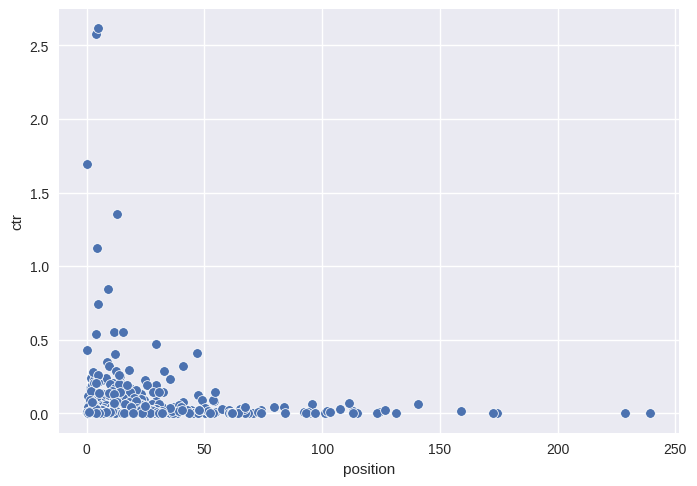

In [ ]:
# Verificando a correlação entre "ctr" e "position"
sns.scatterplot( data=dados_SEO, x='position', y='ctr')

In [ ]:
# Listar as 5 URLs com potencial problema de CTR
urls_com_problema_ctr = dados_SEO[(dados_SEO['position'] > dados_SEO['position'].quantile(0.75)) &
                                 (dados_SEO['ctr'] < dados_SEO['ctr'].quantile(0.25))] \
                                .sort_values(by=['ctr', 'position']).head(5)['url']

print('URLs com potencial problema de CTR: \n')
for url in urls_com_problema_ctr:
    print(url)

URLs com potencial problema de CTR: 

/blog/5-dicas-renda-extra-na-quarentena/
/blog/google-assistente/
/blog/assistir-lollapalooza/
/blog/galaxy-fold/
/blog/feirao-serasa-limpa-nome/


**5. Considerando a classificação de funil definida no enunciado (fundo de funil, meio de funil e topo de funil), liste 5 URLs que estão com uma taxa de conversão (conversão de clicks em clickoffs)  pior que o esperado. Liste outras 5 que estão com conversão muito melhor que o esperado.
Assim sendo, justifique sua resposta**

<Axes: xlabel='funil', ylabel='clickoffs'>

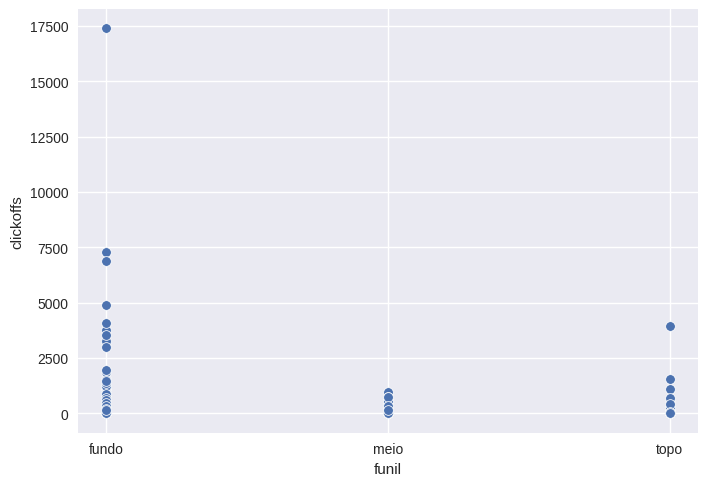

In [ ]:
# Verificando a correlação entre as classificações de funil e clickoffs
sns.scatterplot( data=dados_SEO, x='funil', y='clickoffs')

In [ ]:
# Calculando a taxa de conversão (clickoffs/clicks)
dados_SEO['taxa_conversao (clicks/clickoffs)'] = dados_SEO['clickoffs'] / dados_SEO['clicks']

# Substituindo valores 'inf' resultantes de possíveis divisões por zero
moda_clicks_clickoffs = dados_SEO.loc[dados_SEO['taxa_conversao (clicks/clickoffs)'] != float('inf'), 'taxa_conversao (clicks/clickoffs)'].mode()[0]
dados_SEO.loc[dados_SEO['taxa_conversao (clicks/clickoffs)'] == float('inf'), 'taxa_conversao (clicks/clickoffs)'] = moda_clicks_clickoffs
dados_SEO

,url,clicks,impressions,ctr,position,clicks_previous,impressions_previous,ctr_previous,position_previous,clickoffs_previous,clickoffs,silo,funil,ganho_trafego,taxa_conversao (clicks/clickoffs)
0,/agtnet,256.0,840,0.035881,6.534267,242.0,33217.0,0.044211,22.166461,30.0,204.0,regionais,fundo,14.0,0.796875
1,/algar-telecom,1.0,3215,0.007190,54.522420,13.0,7416.0,0.000226,9.394839,2.0,1.0,regionais,meio,-12.0,1.000000
2,/algar-telecom/algar-telecom-2-via,850.0,16462,0.161332,2.364724,4523.0,146249.0,0.101568,13.351718,0.0,11.0,regionais,topo,-3673.0,0.012941
3,/algar-telecom/algar-telecom-celular,1518.0,40557,0.131910,15.914198,2468.0,13159.0,0.023319,21.083360,28.0,11.0,regionais,fundo,-950.0,0.007246
4,/algar-telecom/algar-telecom-internet,884.0,60153,0.011151,12.242470,85.0,19531.0,0.050535,21.614295,91.0,65.0,regionais,fundo,799.0,0.073529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,/vivo/vivo-play,96.0,75251,0.000912,3.830045,257.0,47270.0,0.000280,3.454239,11.0,20.0,vivo,topo,-161.0,0.208333
925,/vivo/vivo-regulariza,632.0,217276,0.003360,23.539364,2612.0,1155041.0,0.014672,30.243668,153.0,72.0,vivo,topo,-1980.0,0.113924
926,/vivo/vivo-sac,2828.0,833525,0.006707,0.792724,5849.0,703865.0,0.021006,13.094713,80.0,29.0,vivo,topo,-3021.0,0.010255
927,/vivo/vivo-tv,228.0,28749,0.004802,19.790026,65.0,96910.0,0.006878,39.781625,74.0,151.0,vivo,fundo,163.0,0.662281


<Axes: xlabel='taxa_conversao (clicks/clickoffs)', ylabel='Density'>

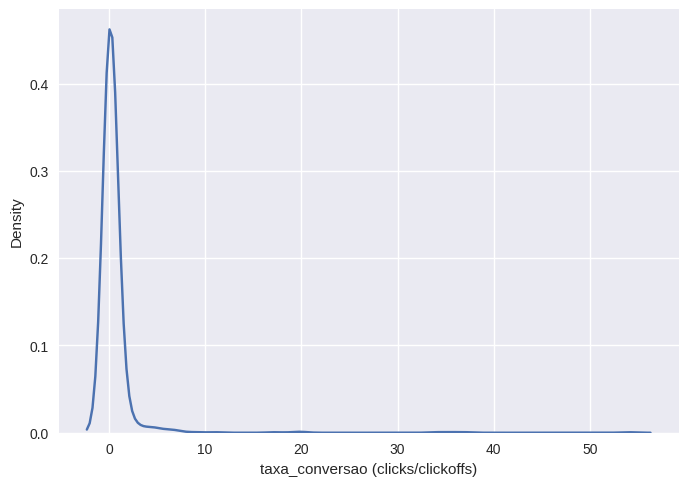

In [ ]:
# Distribuição dos dados da coluna 'taxa_conversao (clicks/clickoffs)'
sns.kdeplot(dados_SEO['taxa_conversao (clicks/clickoffs)'])

Como visto no tópico 'Tratamento de valores ausentes', a distribuição dos dados na coluna 'taxa_conversao (clicks/clickoffs)' é assimétrica positiva. Logo, é adequado usar o valor mais frequente, isto é, a moda como representação do centro dos dados.

In [ ]:
# Moda da coluna 'taxa_conversao (clicks/clickoffs)'
moda_taxa_conversao = dados_SEO['taxa_conversao (clicks/clickoffs)'].mode()[0]

# Filtrar e coletar URLs que estão nas primeiras posições e com taxa de conversão inferior ao valor central da distribuição dos dados
# Considerando URLs que estão no fundo do funil
urls_pior_conversao = dados_SEO[dados_SEO['funil'] == 'fundo']
urls_pior_conversao = urls_pior_conversao[urls_pior_conversao['taxa_conversao (clicks/clickoffs)'] < moda_taxa_conversao].nlargest(5, 'position')['url']

# Filtrar e coletar URLs que estão nas ultimas posições e com taxa de conversão superior ao valor central da distribuição dos dados
# Considerando URLs que estão no topo do funil
urls_melhor_conversao = dados_SEO[dados_SEO['funil'] == 'topo']
urls_melhor_conversao = urls_melhor_conversao[urls_melhor_conversao['taxa_conversao (clicks/clickoffs)'] > moda_taxa_conversao].nsmallest(5, 'position')['url']

# Lista as 5 URLs com taxa de conversão pior que o esperado
print('URLs com taxa de conversão pior que o esperado: \n')
for url in urls_pior_conversao:
    print(url)

print('\n')

# Lista as 5 URLs com taxa de conversão melhor que o esperado
print('URLs com taxa de conversão melhor que o esperado: \n')
for url in urls_melhor_conversao:
    print(url)

URLs com taxa de conversão pior que o esperado: 

/blog/promocao-de-celular/
/nextel/nextel-internet
/vivo/gvt-vivo
/internet-banda-larga/fibra-optica
/vivo/vivo-internet/planos-de-internet-vivo


URLs com taxa de conversão melhor que o esperado: 

/oi/minha-oi
/desbloquear-chip
/tim/servicos-tim
/claro/claro-net/programacao-net-claro
/vivo/planos-vivo/vivo-roaming-internacional


#<font color= yellow> **Envio dos dados do DataFrame atual para uma nova aba na planilha google sheets utilizada neste desafio:**

In [ ]:
dados_SEO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   url                                929 non-null    object 
 1   clicks                             929 non-null    float64
 2   impressions                        929 non-null    int64  
 3   ctr                                929 non-null    float64
 4   position                           929 non-null    float64
 5   clicks_previous                    929 non-null    float64
 6   impressions_previous               929 non-null    float64
 7   ctr_previous                       929 non-null    float64
 8   position_previous                  929 non-null    float64
 9   clickoffs_previous                 929 non-null    float64
 10  clickoffs                          929 non-null    float64
 11  silo                               929 non-null    object 

In [ ]:

# Verificar se a aba já existe
try:
    registro_geral = planilha.worksheet('registro geral')
except gspread.WorksheetNotFound:
    # Se a aba não existe, cria uma nova
    registro_geral = planilha.add_worksheet(title='registro geral', rows=dados_SEO.shape[0], cols=dados_SEO.shape[1])

# Limpar a nova aba antes de escrever novos dados
registro_geral.clear()

# Fazendo uma cópia do DataFrame atual
dados_SEO_copia = dados_SEO.copy()

# Converter o DataFrame (cópia) para lista de listas (formato aceito pelo gspread)
data_to_write = dados_SEO_copia.values.tolist()

# Definir o intervalo onde os dados serão escritos (começando da célula A1)
registro_geral.update([dados_SEO_copia.columns.values.tolist()] + dados_SEO_copia.values.tolist())

print(f"Dados escritos com sucesso na aba 'registro geral' da planilha.")

Dados escritos com sucesso na aba 'registro geral' da planilha.
